# Predicting Red Wine quality By Using SVC(Support Vector Classifier)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder



In [2]:
wine = pd.read_csv(r"C:\Users\user\Documents\Projects ML\SVM project\winequality-red.csv")

In [3]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Now let's see that which features are resposible for deciding wine quality

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

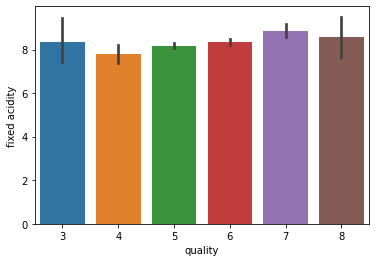

In [5]:
sns.barplot(x ='quality',y='fixed acidity',data=wine)

#### This graph shows that Fixed acidity feature does not give any clear idea to decide the wine Quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

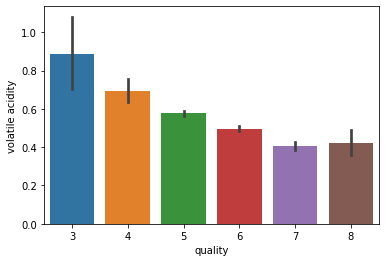

In [6]:
#Graph b/w quality and volatile acidity
sns.barplot(x ='quality',y='volatile acidity',data=wine)

#### This graph shows that quality and volatile acidity are inversly proportional

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

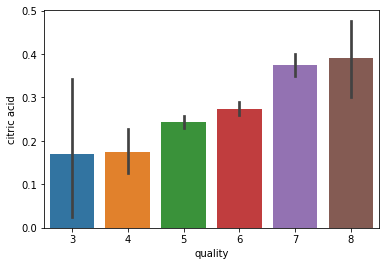

In [7]:
#This Graph shows that citric acid go higher as we go higher in the quality of wine
sns.barplot(x ='quality',y='citric acid',data=wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

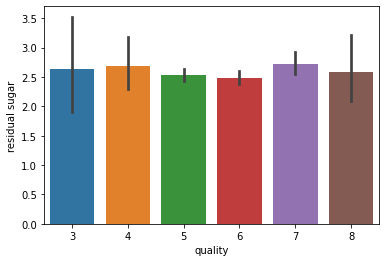

In [8]:
sns.barplot(x ='quality',y='residual sugar',data=wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

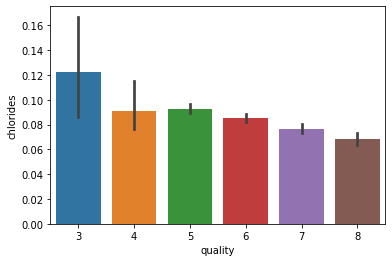

In [9]:
# This graph shows that quality of wine increases as chloride value decreases 
sns.barplot(x ='quality',y='chlorides',data=wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

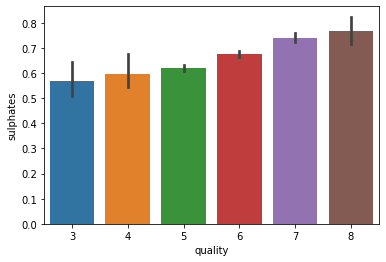

In [10]:
# This graph shows that quality of wine increases as increase in sulphates
sns.barplot(x ='quality',y='sulphates',data=wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

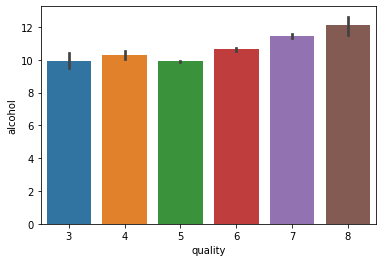

In [11]:
#Quality of wine inc. as alcohol composition increases
sns.barplot(x ='quality',y='alcohol',data=wine)

# Data preprocessing

In [12]:
# We make binary classification as Good or Bad by dividing the limit of quality
bins = (2, 6.5 ,8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=bins,labels=group_names)

In [13]:
label_quality = LabelEncoder()

In [14]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [15]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [16]:
X = wine.drop('quality',axis=1)
Y = wine['quality']

In [17]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 42)

In [18]:
sc = StandardScaler()

In [19]:
X_ = sc.fit_transform(X_train)
Y_ = sc.fit_transform(X_test)

# Now use svc 

In [20]:
svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [21]:
Y_pred = svc.predict(X_test)

In [22]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       413
           1       1.00      0.01      0.03        67

    accuracy                           0.86       480
   macro avg       0.93      0.51      0.48       480
weighted avg       0.88      0.86      0.80       480



# This shows that our svc gets 86% accuracy

# Now lets try to increase our model accuracy by using some hyperparameter tuning techniques

In [23]:
from sklearn.model_selection import GridSearchCV,cross_val_score
param = {'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
          'kernel': ['linear','rbf'],
           'gamma': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
        }
grid_svc = GridSearchCV(svc,param_grid=param,scoring='accuracy',cv=10)

In [ ]:
grid_svc.fit(X_train,Y_train)

In [ ]:
grid_svc.best_params_

In [ ]:
#Now lets run again svc for the best parameters 
svc2 = svc(C=1.2,gamma=0.9,kernal='rbf')
svc2.fit(X_train,Y_train)

Y_pred_ = svc2.predict(X_test)
classification_report(Y_test,Y_pred_)